In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
#### Create Loan Data for Classification in Python ####
ColumnNames=['CIBIL','AGE', 'SALARY', 'APPROVE_LOAN']
DataValues=[[480, 28, 610000, 'Yes'],
             [480, 42, 140000, 'No'],
             [480, 29, 420000, 'No'],
             [490, 30, 420000, 'No'],
             [500, 27, 420000, 'No'],
             [510, 34, 190000, 'No'],
             [550, 24, 330000, 'Yes'],
             [560, 34, 160000, 'Yes'],
             [560, 25, 300000, 'Yes'],
             [570, 34, 450000, 'Yes'],
             [590, 30, 140000, 'Yes'],
             [600, 33, 600000, 'Yes'],
             [600, 22, 400000, 'Yes'],
             [600, 25, 490000, 'Yes'],
             [610, 32, 120000, 'Yes'],
             [630, 29, 360000, 'Yes'],
             [630, 30, 480000, 'Yes'],
             [660, 29, 460000, 'Yes'],
             [700, 32, 470000, 'Yes'],
             [740, 28, 400000, 'Yes']]

#Create the Data Frame
LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData.head()

,CIBIL,AGE,SALARY,APPROVE_LOAN
0,480,28,610000,Yes
1,480,42,140000,No
2,480,29,420000,No
3,490,30,420000,No
4,500,27,420000,No


In [2]:
#Separate Target Variable and Predictor Variables
TargetVariable='APPROVE_LOAN'
Predictors=['CIBIL','AGE', 'SALARY']
X=LoanData[Predictors].values
y=LoanData[TargetVariable].values

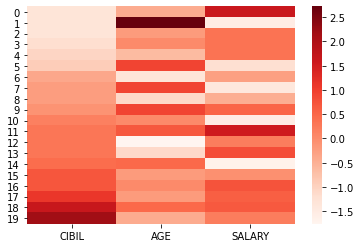

In [9]:
dat = LoanData[Predictors]
dat_norm = (dat - dat.mean()) / dat.std()
sns.heatmap(dat_norm, cmap='Reds')
plt.show()

In [10]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
###################################################################
###### Xgboost Classification in Python #######
from xgboost import XGBClassifier
clf=XGBClassifier(
    max_depth=3, 
    learning_rate=0.1, 
    n_estimators=500, 
    objective='binary:logistic', 
    booster='gbtree')

#Printing all the parameters of XGBoost
print(clf)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='binary:logistic',
              predictor=None, random_state=None, reg_alpha=None, ...)


In [12]:
#Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No' 'Yes']

In [ ]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


In [ ]:


###################################################################
###### Xgboost Classification in Python #######
import pandas as pd
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

#Printing all the parameters of XGBoost
print(clf)

#Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()